<a href="https://colab.research.google.com/github/nestratovaam/lab_2_semestr/blob/main/lab7_Nestratova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вариант 21

In [64]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from math import sqrt

url='http://pogoda-service.ru/archive_gsod_res.php?country=LA&station=489570&datepicker_beg=01.12.2010&datepicker_end=01.12.2020&bsubmit=%D0%9F%D0%BE%D1%81%D0%BC%D0%BE%D1%82%D1%80%D0%B5%D1%82%D1%8C'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[0]
df

,ÐÐ°ÑÐ°,ÐÐ°ÐºÑÐ¸Ð¼Ð°Ð»ÑÐ½Ð°Ñ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°,ÐÐ¸Ð½Ð¸Ð¼Ð°Ð»ÑÐ½Ð°Ñ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°,Ð¡ÑÐµÐ´Ð½ÑÑ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°,ÐÑÐ¼Ð¾ÑÑÐµÑÐ½Ð¾Ðµ Ð´Ð°Ð²Ð»ÐµÐ½Ð¸Ðµ,Ð¡ÐºÐ¾ÑÐ¾ÑÑÑ Ð²ÐµÑÑÐ°,ÐÑÐ°Ð´ÐºÐ¸,Ð­ÑÑÐµÐºÑÐ¸Ð²Ð½Ð°Ñ ÑÐµÐ¼Ð¿ÐµÑÐ°ÑÑÑÐ°
0,01.12.2010,32.5,22.8,29.3,996.7,2.0,0.0,30.7
1,02.12.2010,33.0,20.5,28.6,998.4,2.0,0.0,29.9
2,03.12.2010,32.0,24.0,29.3,998.6,2.0,0.0,30.9
3,04.12.2010,31.2,20.0,27.7,997.5,1.0,0.0,29.7
4,05.12.2010,33.0,20.5,29.0,995.9,1.0,0.0,31.4
...,...,...,...,...,...,...,...,...
995,27.01.2014,32.8,15.5,26.5,1001.9,1.0,0.0,27.7
996,28.01.2014,31.9,17.5,26.3,1002.1,1.0,0.0,27.7
997,30.01.2014,31.0,16.5,25.6,1002.4,2.0,0.0,26.2
998,31.01.2014,31.6,14.5,25.6,1001.9,1.0,0.0,27.4


In [65]:
df.columns=['Date', 'Max temp', 'Min temp', 'Av temp','Atm pressure','Percipitation', 'Wind speed', 'Effective temp']

In [66]:
df

,Date,Max temp,Min temp,Av temp,Atm pressure,Percipitation,Wind speed,Effective temp
0,01.12.2010,32.5,22.8,29.3,996.7,2.0,0.0,30.7
1,02.12.2010,33.0,20.5,28.6,998.4,2.0,0.0,29.9
2,03.12.2010,32.0,24.0,29.3,998.6,2.0,0.0,30.9
3,04.12.2010,31.2,20.0,27.7,997.5,1.0,0.0,29.7
4,05.12.2010,33.0,20.5,29.0,995.9,1.0,0.0,31.4
...,...,...,...,...,...,...,...,...
995,27.01.2014,32.8,15.5,26.5,1001.9,1.0,0.0,27.7
996,28.01.2014,31.9,17.5,26.3,1002.1,1.0,0.0,27.7
997,30.01.2014,31.0,16.5,25.6,1002.4,2.0,0.0,26.2
998,31.01.2014,31.6,14.5,25.6,1001.9,1.0,0.0,27.4


In [67]:
df = df[['Date', 'Av temp']]
df.set_index(['Date'], inplace=True)
df

,Av temp
Date,
01.12.2010,29.3
02.12.2010,28.6
03.12.2010,29.3
04.12.2010,27.7
05.12.2010,29.0
...,...
27.01.2014,26.5
28.01.2014,26.3
30.01.2014,25.6


## Нормализация

In [68]:
values = df.values
values = values.reshape((len(values), 1))
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))
normalized = scaler.transform(values)
for i in range(5):
  print(normalized[i])
inversed = scaler.inverse_transform(normalized)
for i in range(5):
  print(inversed[i])

Min: 18.500000, Max: 34.900000
[0.65853659]
[0.61585366]
[0.65853659]
[0.56097561]
[0.6402439]
[29.3]
[28.6]
[29.3]
[27.7]
[29.]


## Гистограмма

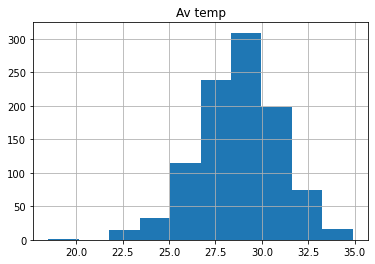

In [69]:
df.hist()
plt.show()

## Стандартизация

In [71]:
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))
norm = scaler.transform(values)
for i in range(5):
  print(norm[i])
inversed = scaler.inverse_transform(norm)
for i in range(5):
  print(inversed[i])

Mean: 28.762700, StandardDeviation: 2.190593
[0.24527602]
[-0.07427212]
[0.24527602]
[-0.48511973]
[0.10832682]
[29.3]
[28.6]
[29.3]
[27.7]
[29.]


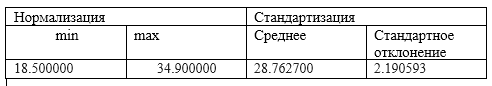